# 图形初阶
## 使用图形

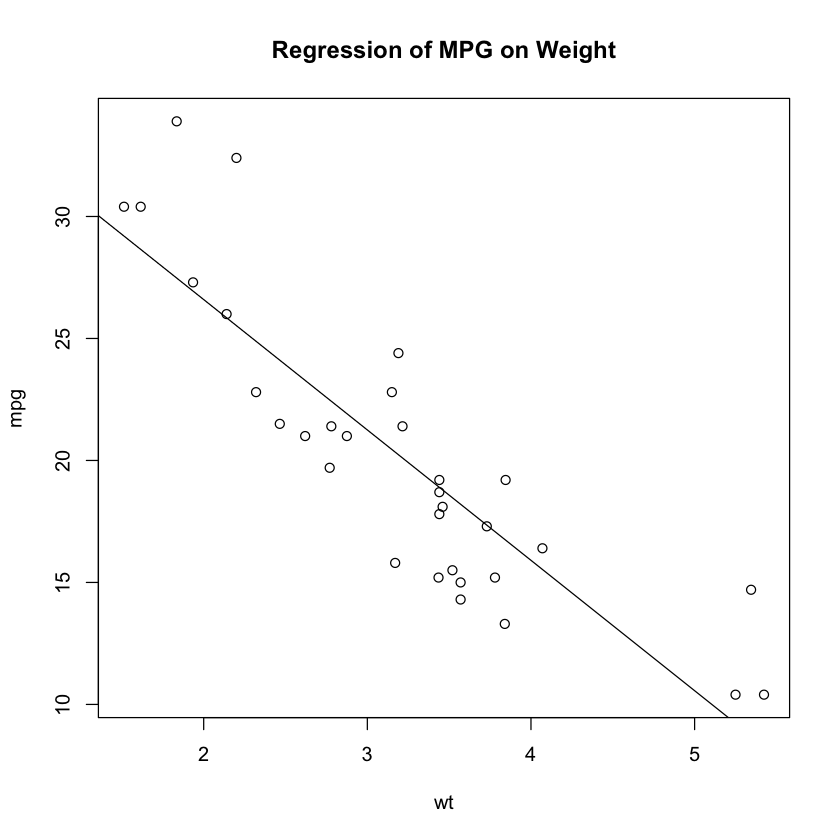

In [1]:
attach(mtcars)
plot(wt, mpg)
abline(lm(mpg~wt))
title("Regression of MPG on Weight")
detach(mtcars)

## 一个简单的例子
![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/17331226.jpg)

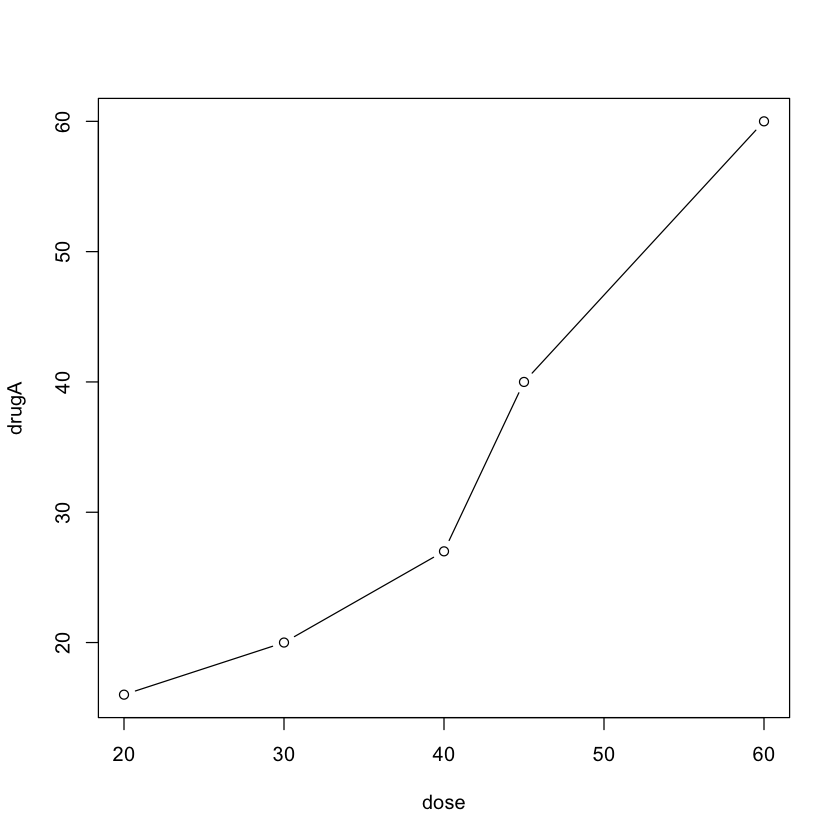

In [2]:
dose  <- c(20, 30, 40, 45, 60)
drugA <- c(16, 20, 27, 40, 60)
drugB <- c(15, 18, 25, 31, 40)
plot(dose, drugA, type="b") # 选项type="b"表示同时绘制点和线。

## 图形参数
其调用格式为par(optionname=value, optionname=name,...)。不加参数地执行par()将生成一个含有当前图形参数设置的列表。 添加参数no.readonly=TRUE可以生成一个可以修改的当前图形参数列表。

使用实心三角而不是空心圆圈作为点的符号，并且想用虚线代替 实线连接这些点:

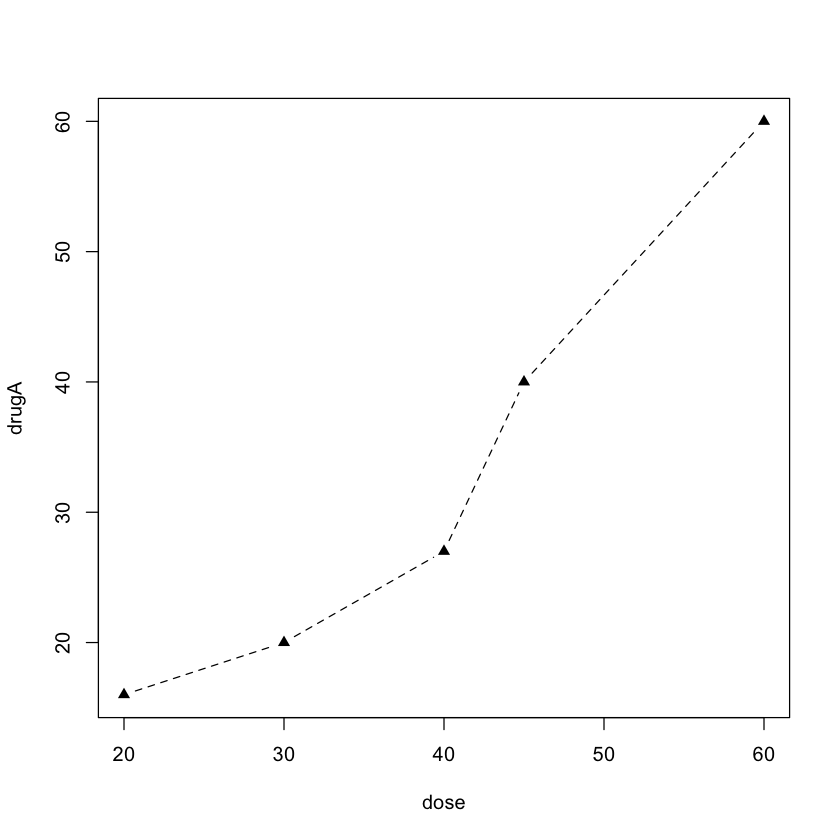

In [3]:
opar <- par(no.readonly=TRUE) # 复制了一份当前的图形参数设置
par(lty=2, pch=17) # 将默认的线条类型修改为虚线(lty=2) 并将默认的点符号改为了实心三角(pch=17)
plot(dose, drugA, type="b")
par(opar)

可以通过代码:

```r
plot(dose, drugA, type="b", lty=2, pch=17)
```

来生成与上图相同的图形。

### 符号和线条
![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/26131119.jpg)

选项pch=用于指定绘制点时使用的符号。可能的值如图3-4所示。

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/61384361.jpg)

对于符号21~25，你还可以指定边界颜色(col=)和填充色(bg=)。

选项lty=用于指定想要的线条类型。可用的值如图3-5所示。

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/38052790.jpg)

绘制一幅图形，其线条类型为点线，宽度为默认宽度的3倍，点的符号为实心正方形，大小为默认符号大小的2倍:

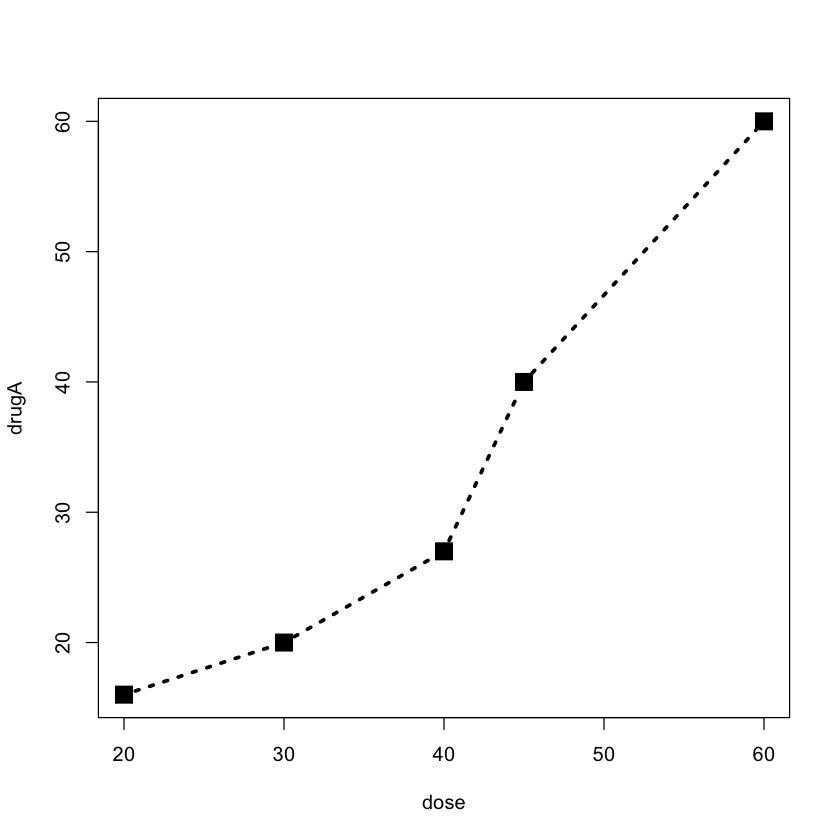

In [4]:
plot(dose, drugA, type="b", lty=3, lwd=3, pch=15, cex=2)

### 颜色
![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/41565064.jpg)

在R中，可以通过颜色下标、颜色名称、十六进制的颜色值、RGB值或HSV值来指定颜色。 举例来说，col=1、col="white"、col="#FFFFFF"、col=rgb(1,1,1)和col=hsv(0,0,1)都是表示白色的等价方式。函数rgb()可基于红-绿-蓝三色值生成颜色，而hsv()则基于色相- 饱和度-亮度值来生成颜色。

从Set1调色板中抽取了7种用十六进制表示的颜色并返回一个向量:

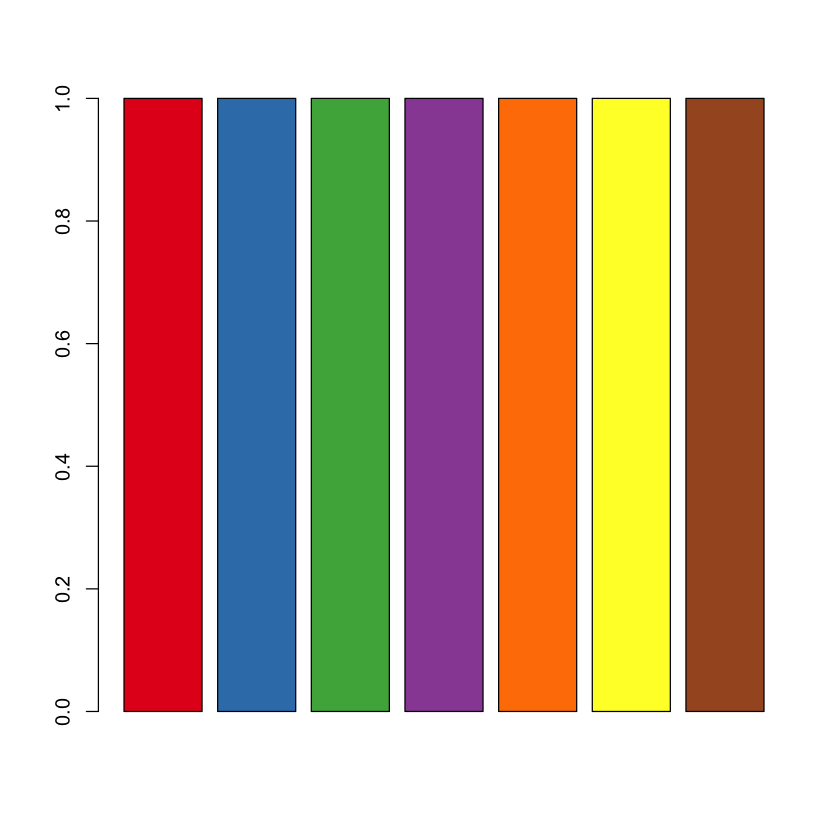

In [5]:
library(RColorBrewer)
n <- 7
mycolors <- brewer.pal(n, "Set1")
barplot(rep(1,n), col=mycolors)

多阶灰度色可使用基础安装所自带的gray()函数生成。这时要通过一个元素值为0和 1之间的向量来指定各颜色的灰度。gray(0:10/10)将生成10阶灰度色:

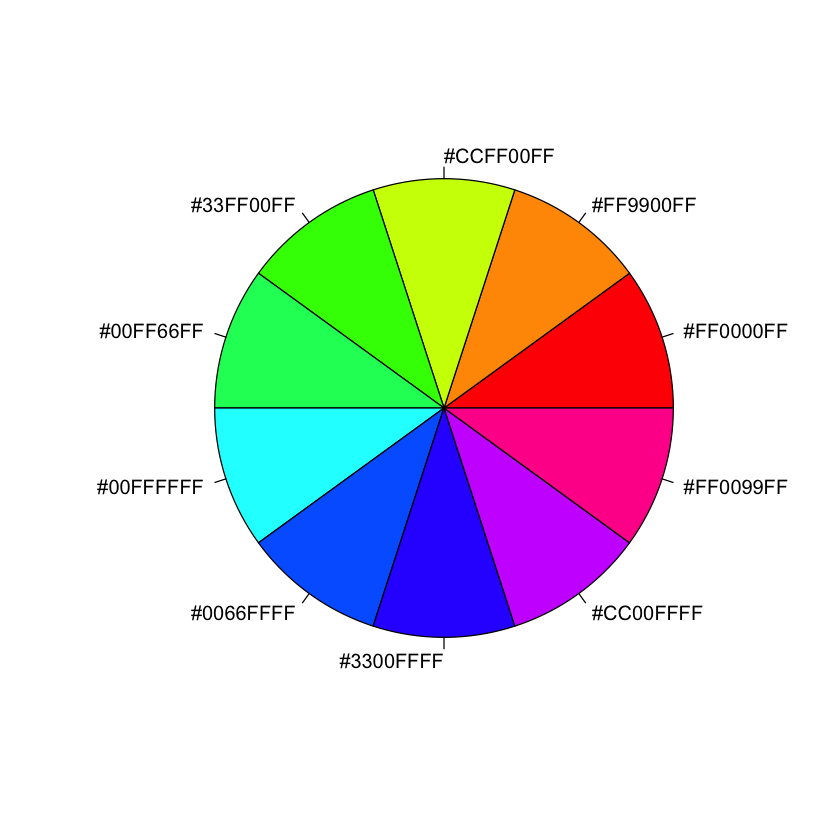

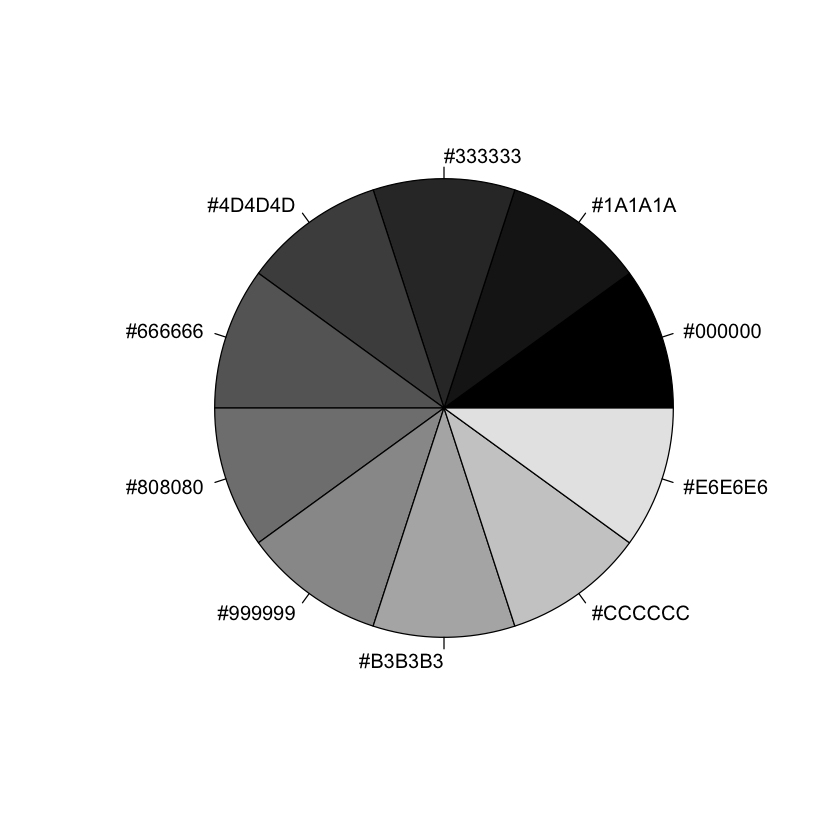

In [6]:
n <- 10
mycolors <- rainbow(n)
pie(rep(1, n), labels=mycolors, col=mycolors)
mygrays <- gray(0:n/n)
pie(rep(1, n), labels=mygrays, col=mygrays)

### 文本属性
![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/42006884.jpg)

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/10742209.jpg)

在执行语句:

```r
par(font.lab=3, cex.lab=1.5, font.main=4, cex.main=2)
```

之后创建的所有图形都将拥有斜体、1.5倍于默认文本大小的坐标轴标签(名称)，以及粗斜体、 2倍于默认文本大小的标题。

### 图形尺寸与边界尺寸
![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/985648.jpg)

代码:

```r
par(pin=c(4,3), mai=c(1,.5, 1, .2))
```

可生成一幅4英寸宽、3英寸高、上下边界为1英寸、左边界为0.5英寸、右边界为0.2英寸的图形。

代码清单3-1 使用图形参数控制图形外观

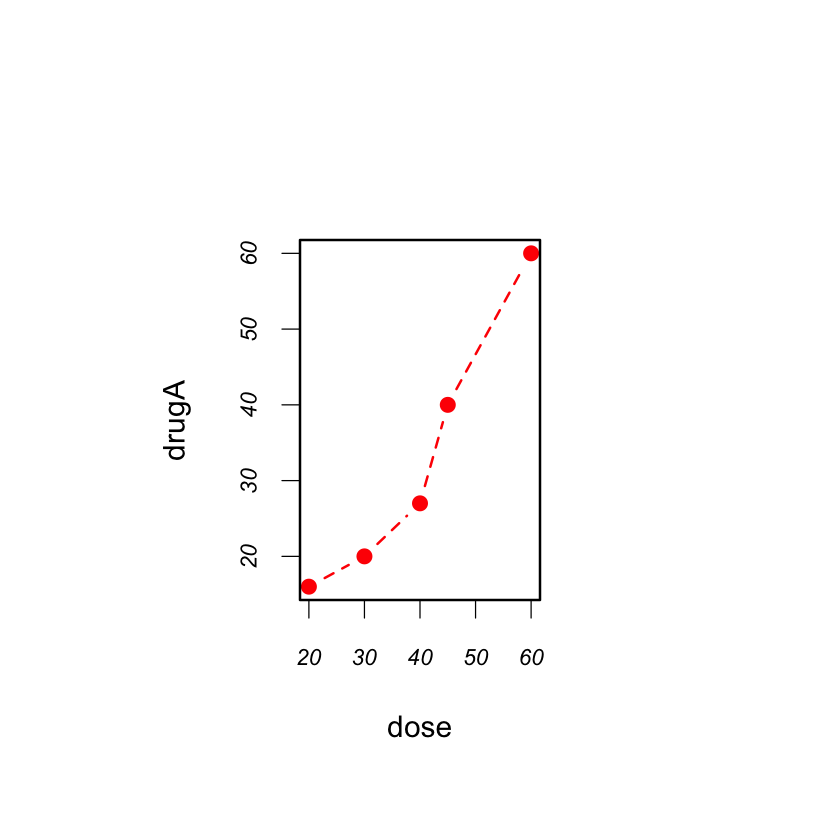

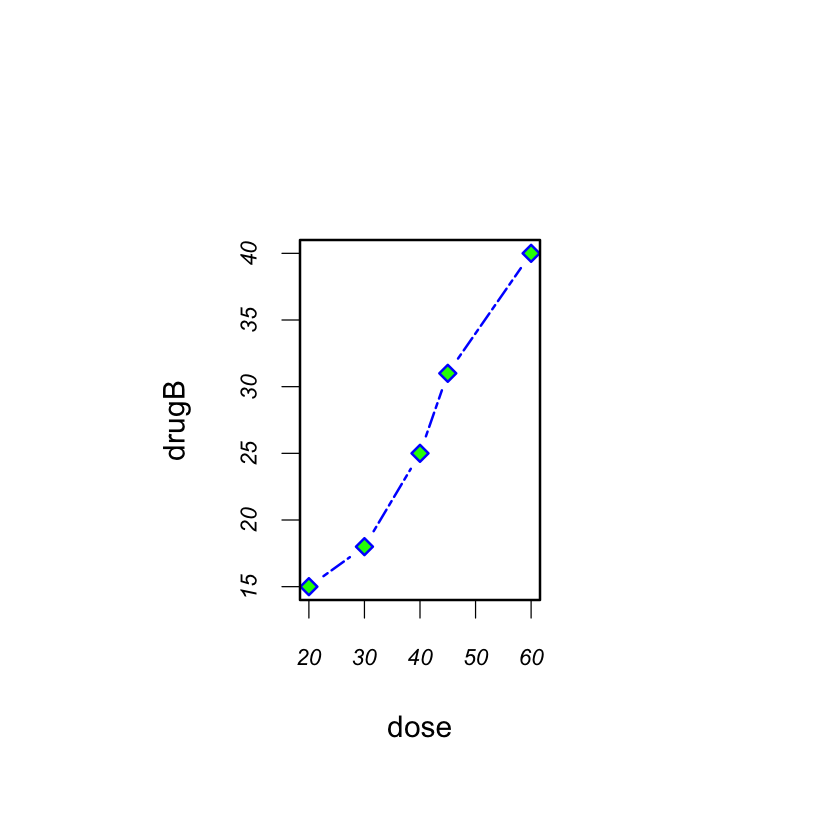

In [8]:
dose  <- c(20, 30, 40, 45, 60)
drugA <- c(16, 20, 27, 40, 60)
drugB <- c(15, 18, 25, 31, 40)

opar <- par(no.readonly=TRUE)
par(pin=c(2, 3)) # 2英寸宽、3英寸高
par(lwd=2, cex=1.5) # 线条的宽度将为默认宽度的两倍，符号将为默认大小的1.5倍
par(cex.axis=.75, font.axis=3) # 坐标轴刻度文本被设置为斜体、缩 小为默认大小的75%

plot(dose, drugA, type="b", pch=19, lty=2, col="red") # 红色实心圆圈和虚线
plot(dose, drugB, type="b", pch=23, lty=6, col="blue", bg="green") # 绿色填充 的绿色菱形加蓝色边框和蓝色虚线

par(opar) # 还原了初始的图形参数设置

## 添加文本、自定义坐标轴和图例
以下代码在图形上添加了标题(main)、副标题(sub)、坐标轴标签(xlab、ylab)并指定了坐标轴范围(xlim、ylim)。

注意 某些高级绘图函数已经包含了默认的标题和标签。你可以通过在plot()语句或单独的 par()语句中添加ann=FALSE来移除它们。

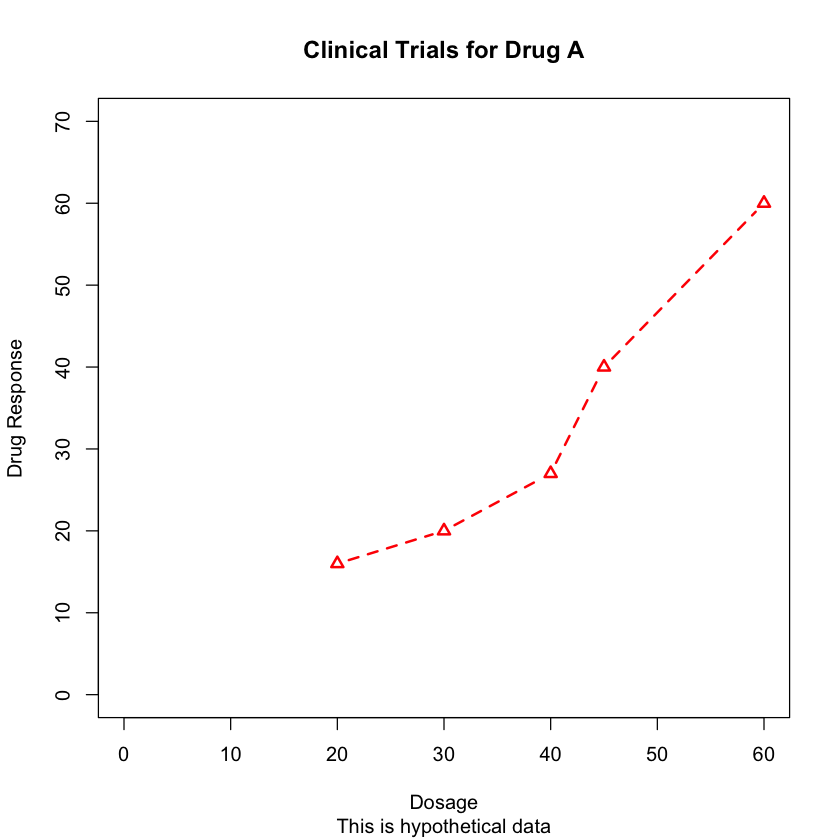

In [9]:
plot(dose, drugA, type="b",
     col="red", lty=2, pch=2, lwd=2,
     main="Clinical Trials for Drug A",
     sub="This is hypothetical data",
     xlab="Dosage", ylab="Drug Response",
     xlim=c(0, 60), ylim=c(0, 70))

### 标题
可以使用title()函数为图形添加标题和坐标轴标签。调用格式为:

```r
    title(main="main title", sub="subtitle",
          xlab="x-axis label", ylab="y-axis label")
```

函数title()中亦可指定其他图形参数(如文本大小、字体、旋转角度和颜色)。举例来说， 以下代码将生成红色的标题和蓝色的副标题，以及比默认大小小25%的绿色x轴、y轴标签:

```r
    title(main="My Title", col.main="red",
          sub="My Subtitle", col.sub="blue",
          xlab="My X label", ylab="My Y label",
          col.lab="green", cex.lab=0.75)
```

函数title()一般来说被用于添加信息到一个默认标题和坐标轴标签被ann=FALSE选项移除的图形中。

### 坐标轴
你可以使用函数axis()来创建自定义的坐标轴，而非使用R中的默认坐标轴。其格式为: 

```r
axis(side, at=, labels=, pos=, lty=, col=, las=, tck=, ...)
```

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/49870111.jpg)

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/53613470.jpg)

创建自定义坐标轴时，你应当禁用高级绘图函数自动生成的坐标轴。参数axes=FALSE将禁用全部坐标轴(包括坐标轴框架线，除非你添加了参数frame.plot=TRUE)。参数xaxt="n"和 yaxt="n"将分别禁用X轴或Y轴(会留下框架线，只是去除了刻度)。

代码清单3-2 自定义坐标轴的示例

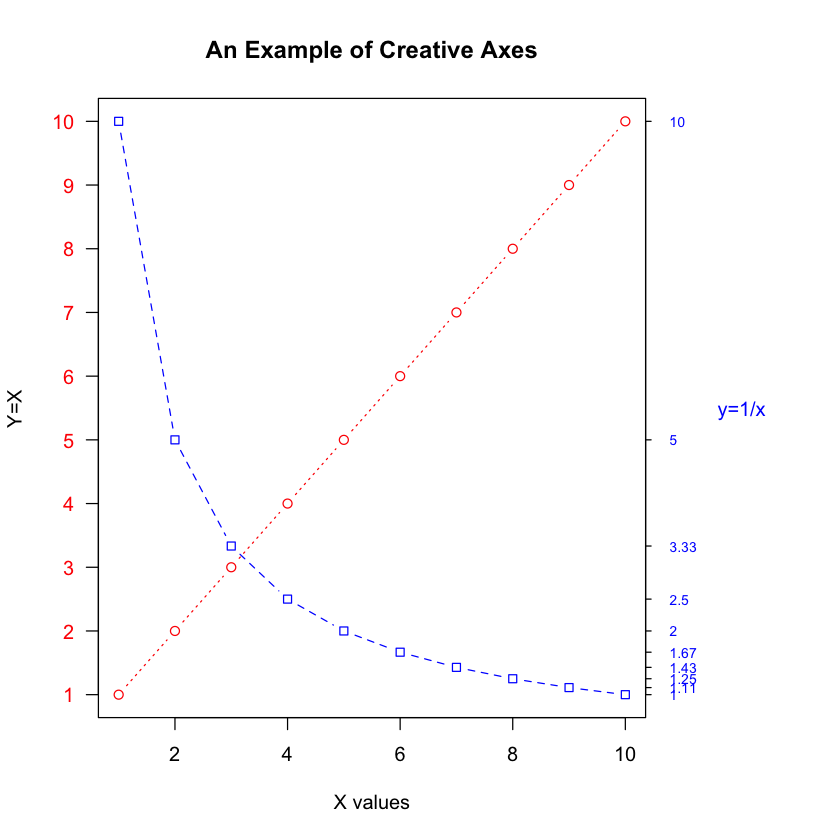

In [10]:
x <- c(1:10)
y <- x
z <- 10/x
opar <- par(no.readonly=TRUE)

par(mar=c(5, 4, 4, 8) + 0.1) # 增加边界大小

plot(x, y, type="b",
     pch=21, col="red",
     yaxt="n", lty=3, ann=FALSE) # 绘制x对y的图形

lines(x, z, type="b", pch=22, col="blue", lty=2) # 添加x对10/x的直线

axis(2, at=x, labels=x, col.axis="red", las=2)
axis(4, at=z, labels=round(z, digits=2),
     col.axis="blue", las=2, cex.axis=0.7, tck=-.01)

mtext("y=1/x", side=4, line=3, cex.lab=1, las=2, col="blue")

title("An Example of Creative Axes",
      xlab="X values",
      ylab="Y=X")
par(opar)

### 参考线
函数abline()可以用来为图形添加参考线。其使用格式为: 

```r
abline(h=yvalues, v=xvalues)
```

### 图例
```r
legend(location, title, legend, ...)
```

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/72328051.jpg)

代码清单3-3 依剂量对比药物A和药物B的响应情况

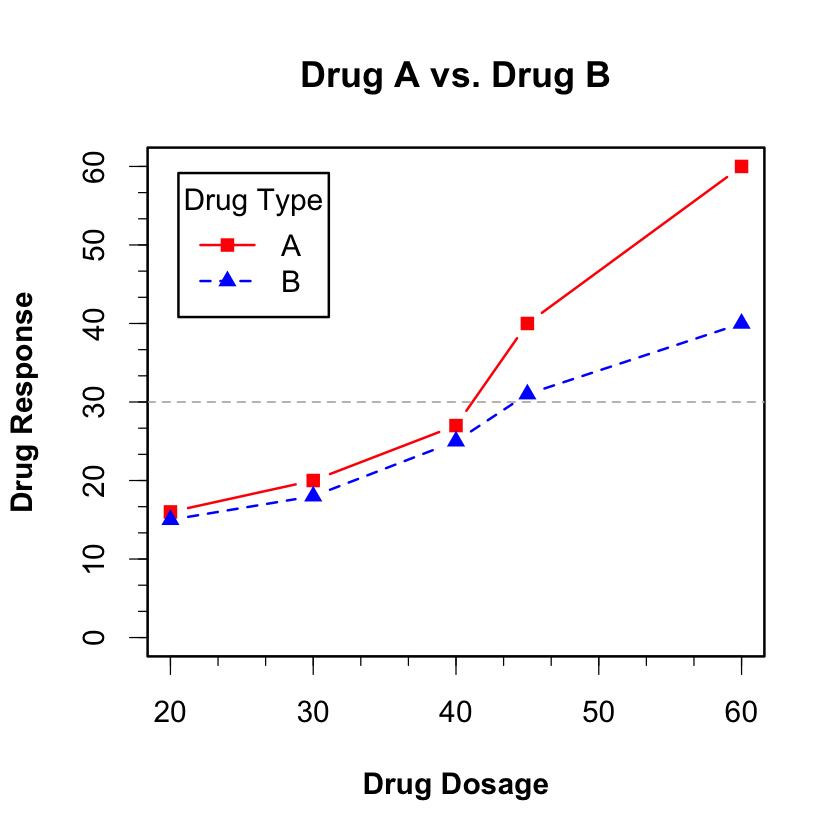

In [13]:
dose  <- c(20, 30, 40, 45, 60)
drugA <- c(16, 20, 27, 40, 60)
drugB <- c(15, 18, 25, 31, 40)

opar <- par(no.readonly=TRUE)

par(lwd=2, cex=1.5, font.lab=2) # 增加线条、文本、符号、标签的宽度或大小

plot(dose, drugA, type="b",
     pch=15, lty=1, col="red", ylim=c(0, 60), main="Drug A vs. Drug B",
     xlab="Drug Dosage", ylab="Drug Response")

lines(dose, drugB, type="b", pch=17, lty=2, col="blue")

abline(h=c(30), lwd=1.5, lty=2, col="gray")

library(Hmisc)
minor.tick(nx=3, ny=3, tick.ratio=0.5) # 添加次要刻度线

legend("topleft", inset=.05, title="Drug Type", c("A","B"), # 添加图例
       lty=c(1, 2), pch=c(15, 17), col=c("red", "blue"))

par(opar)

### 文本标注
text()可向绘图区域内部添加
文本，而mtext()则向图形的四个边界之一添加文本。使用格式分别为: 

```r
text(location, "text to place", pos, ...)
mtext("text to place", side, line=n, ...)
```

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/90255345.jpg)

The following object is masked from package:ggplot2:

    mpg



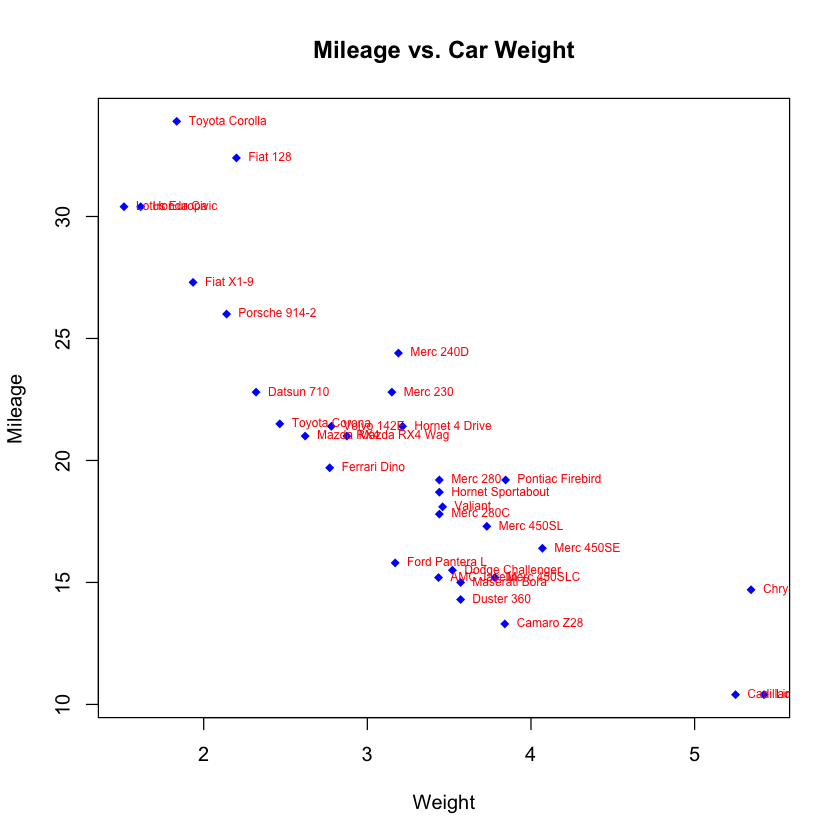

In [15]:
attach(mtcars)
plot(wt, mpg,
     main="Mileage vs. Car Weight",
     xlab="Weight", ylab="Mileage",
     pch=18, col="blue")
text(wt, mpg, row.names(mtcars), cex=0.6, pos=4, col="red")
detach(mtcars)

以下是一段展示不同字体族的代码:

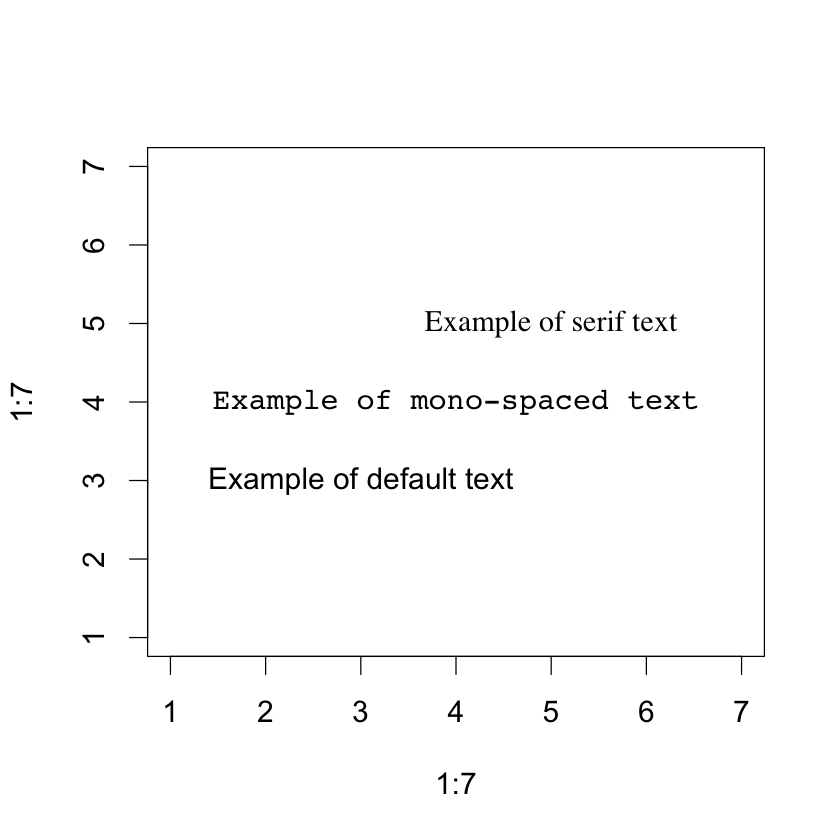

In [16]:
opar <- par(no.readonly=TRUE)
par(cex=1.5)
plot(1:7,1:7,type="n")
text(3,3,"Example of default text")
text(4,4,family="mono","Example of mono-spaced text")
text(5,5,family="serif","Example of serif text")
par(opar)

### 数学标注
函数plotmath()可以为图形主体或边界上的标题、坐标轴名称 或文本标注添加数学符号。

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/98999219.jpg)

## 图形的组合
你可以在par()函数中使用图形参数mfrow=c(nrows, ncols)来创建按行填充的、行数为 nrows、列数为ncols的图形矩阵。另外，可以使用mfcol=c(nrows, ncols)按列填充矩阵。

以下代码创建了四幅图形并将其排布在两行两列中:

The following object is masked from package:ggplot2:

    mpg



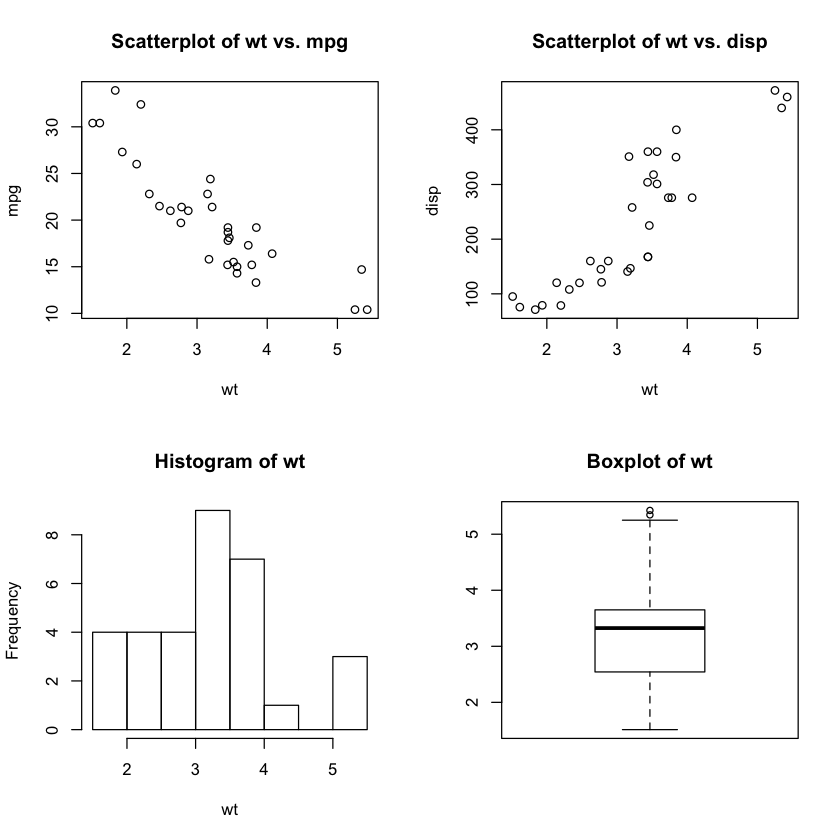

In [17]:
attach(mtcars)
opar <- par(no.readonly=TRUE)
par(mfrow=c(2,2))
plot(wt,mpg, main="Scatterplot of wt vs. mpg")
plot(wt,disp, main="Scatterplot of wt vs. disp")
hist(wt, main="Histogram of wt")
boxplot(wt, main="Boxplot of wt")
par(opar)
detach(mtcars)

依三行一列排布三幅图形。代码如下:

The following object is masked from package:ggplot2:

    mpg



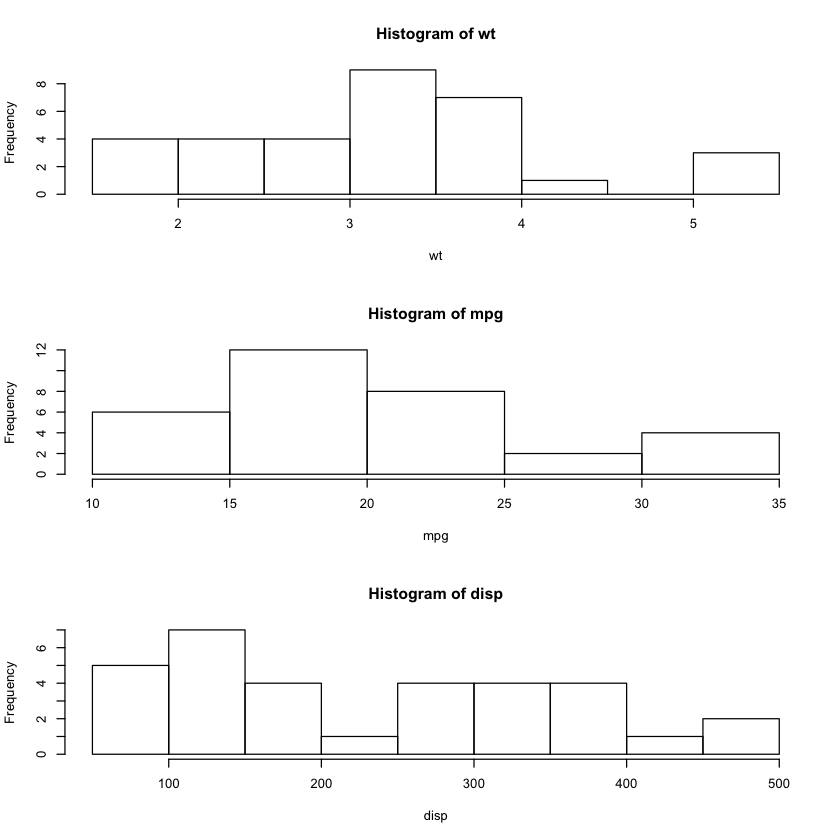

In [18]:
attach(mtcars)
opar <- par(no.readonly=TRUE)
par(mfrow=c(3,1))
hist(wt)
hist(mpg)
hist(disp)
par(opar)
detach(mtcars)

函数layout()的调用形式为layout(mat)，其中的mat是一个矩阵，它指定了所要组合的多个图形的所在位置。在以下代码中，一幅图被置于第1行，另两幅图则被置于第2行:

The following object is masked from package:ggplot2:

    mpg



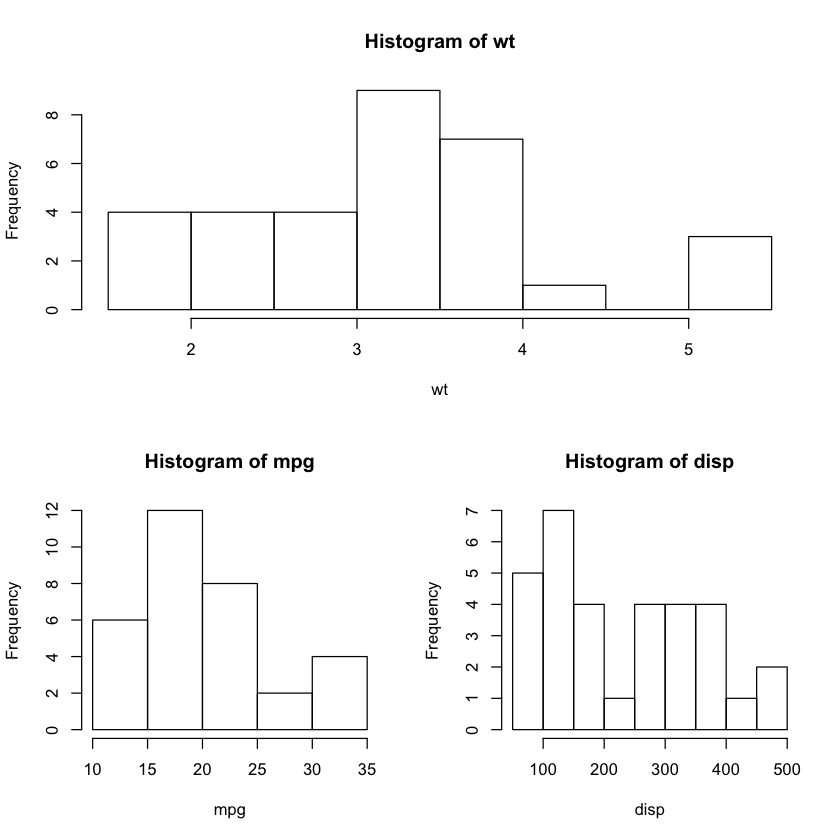

In [19]:
attach(mtcars)
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
hist(wt)
hist(mpg)
hist(disp)
detach(mtcars)

为了更精确地控制每幅图形的大小，可以有选择地在layout()函数中使用widths=和 heights=两个参数。其形式为:
- widths = 各列宽度值组成的一个向量 
- heights = 各行高度值组成的一个向量

相对宽度可以直接通过数值指定，绝对宽度(以厘米为单位)可以通过函数lcm()来指定。

在以下代码中，我们再次将一幅图形置于第1行，两幅图形置于第2行。但第1行中图形的高度是第2行中图形高度的二分之一。除此之外，右下角图形的宽度是左下角图形宽度的三分之一:

The following object is masked from package:ggplot2:

    mpg



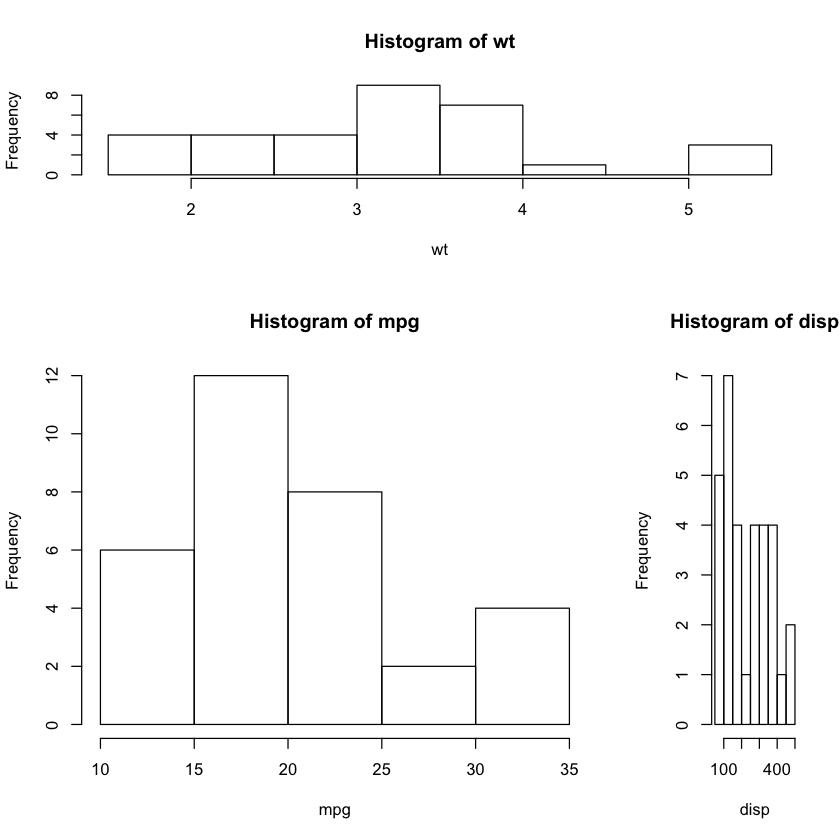

In [20]:
attach(mtcars)
layout(matrix(c(1, 1, 2, 3), 2, 2, byrow = TRUE),
       widths=c(3, 1), heights=c(1, 2))
hist(wt)
hist(mpg)
hist(disp)
detach(mtcars)

可能有很多时候，你想通过排布或叠加若干图形来创建单幅的、有意义的图形，这需要有对图形布局的精细控制能力。你可以使用图形参数fig=完成这个任务。

代码清单3-4 多幅图形布局的精细控制

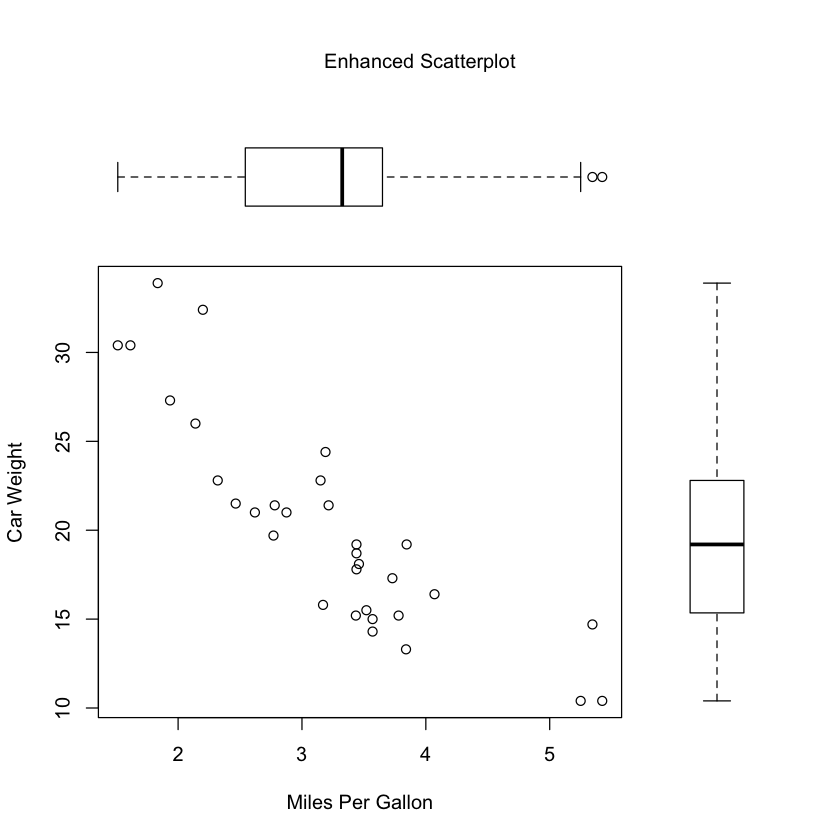

In [21]:
opar <- par(no.readonly=TRUE)
par(fig=c(0, 0.8, 0, 0.8))
plot(mtcars$wt, mtcars$mpg,
     xlab="Miles Per Gallon",
     ylab="Car Weight")
par(fig=c(0, 0.8, 0.55, 1), new=TRUE)
boxplot(mtcars$wt, horizontal=TRUE, axes=FALSE)
par(fig=c(0.65, 1, 0, 0.8), new=TRUE)
boxplot(mtcars$mpg, axes=FALSE)
mtext("Enhanced Scatterplot", side=3, outer=TRUE, line=-3)
par(opar)

左下角坐标为(0, 0)，而右上角坐标为(1, 1)。图3-19是一幅示意图。参数fig=的取值是一个形如c(x1, x2, y1, y2)的数值向量。

![](http://ou8qjsj0m.bkt.clouddn.com//17-11-7/13631561.jpg)

第一个fig=将散点图设定为占据横向范围0~0.8，纵向范围0~0.8。上方的箱线图横向占据 0~0.8，纵向0.55~1。右侧的箱线图横向占据0.65~1，纵向0~0.8。fig=默认会新建一幅图形，所 以在添加一幅图到一幅现有图形上时，请设定参数new=TRUE。